# 文本聚类
skit-learn

In [32]:
import json
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans

# 假设这是您从JSON文件中读取的数据
json_path = 'query.json'
data = json.load(open(json_path, 'r', encoding='utf-8'))

In [33]:
data[:2]

[{'question': '请对给定的图片进行描述。',
  'related_image': 'vwsscflkvakdictzacfx.jpg',
  'answer': ''},
 {'question': '这款运动裤是什么材质做的？',
  'related_image': 'jjxjzgkbrfizjwfngwis.jpg',
  'answer': ''}]

In [34]:
# 提取问题
questions = [item['question'] for item in data]
questions[:2]

['请对给定的图片进行描述。', '这款运动裤是什么材质做的？']

In [35]:
# 文本预处理
vectorizer = CountVectorizer() # 词频统计
count_matrix = vectorizer.fit_transform(questions) # 将文本转换为词频矩阵
# 测试count_matrix
count_matrix

<1497x1201 sparse matrix of type '<class 'numpy.int64'>'
	with 2535 stored elements in Compressed Sparse Row format>

In [36]:
tfidf_transformer = TfidfTransformer() # TF-IDF转换
tfidf_matrix = tfidf_transformer.fit_transform(count_matrix) # 将词频矩阵转换为TF-IDF
# 测试tfidf_matrix
tfidf_matrix

<1497x1201 sparse matrix of type '<class 'numpy.float64'>'
	with 2535 stored elements in Compressed Sparse Row format>

In [37]:
# 使用K-means进行聚类
n_clusters = 3  # 假设我们想要2个聚类
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(tfidf_matrix)
labels = kmeans.labels_

# 将聚类标签分配给每个问题
clustered_data = [{'question': q, 'cluster': l} for q, l in zip(questions, labels)]

# 打印聚类结果
for item in clustered_data:
    print(f"问题：{item['question']}，聚类：{item['cluster']}")

问题：请对给定的图片进行描述。，聚类：1
问题：这款运动裤是什么材质做的？，聚类：0
问题：这套衣服是什么材质的？，聚类：0
问题：请匹配到与 快鱼AGW系列T恤男新款宽松上衣海浪字母印花短袖T恤 最相关的图片。，聚类：2
问题：请匹配到与 森马t恤短袖女2019新款潮流白色纯色纯棉打底情侣装上衣女夏ins潮 最相关的图片。，聚类：2
问题：这款牛仔短裤是2019年的新款吗？，聚类：0
问题：请对给定的图片进行描述。，聚类：1
问题：请匹配到与 蓝若水大码女装胖mm2019秋装新款胯宽的女生撞色松紧抽绳休闲裤子 最相关的图片。，聚类：2
问题：请对给定的图片进行描述。，聚类：1
问题：这件连衣裙是什么季节穿的？，聚类：0
问题：这件连衣裙是什么季节的？，聚类：0
问题：这款帕波仕蒂男士皮衣是哪一年的新款？，聚类：0
问题：这件孕妇连衣裙适合哪个季节穿？，聚类：0
问题：这款连衣裙是什么风格的？，聚类：0
问题：请匹配到与 雪纺衬衣女夏2019新款V领荷叶边时尚超火百搭半袖喇叭袖雪纺衫 最相关的图片。，聚类：2
问题：请对给定的图片进行描述。，聚类：1
问题：请对给定的图片进行描述。，聚类：1
问题：这款羽绒服是男款还是女款？，聚类：0
问题：请对给定的图片进行描述。，聚类：1
问题：这款连衣裙适合胖mm吗？，聚类：0
问题：这件雪纺衫是什么季节穿的？，聚类：0
问题：这款罗衣原创连衣裙是什么季节的新款？，聚类：0
问题：这款裙子是2019年的新款吗？，聚类：0
问题：这件连衣裙是什么风格的？，聚类：0
问题：这款连衣裙是什么材质制成的？，聚类：0
问题：请对给定的图片进行描述。，聚类：1
问题：这件条纹t恤是什么季节穿的？，聚类：0
问题：这件孕妇装适合哪个季节穿？，聚类：0
问题：请匹配到与 JUZUI/玖姿官方旗舰店2019夏季新款时尚印花系带短袖套头薄小衫女 最相关的图片。，聚类：2
问题：请匹配到与 林秀英/洪系列  宽松透气时尚长袖风衣外套77177A 最相关的图片。，聚类：2
问题：这件克劳德乌鸦荷叶边印花衬衫是2019夏季款吗？，聚类：0
问题：这款裙子是2019年的新款吗？，聚类：0
问题：这款T恤有弹性吗？，聚类：0
问题：这款T恤是什么材质的？，聚类：0
问题：请匹配到与 佳人苑长袖网纱连衣裙女 2019春装新款气质圆领纯色中长款A字裙 最相关的

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1497 samples in 0.004s...
[t-SNE] Computed neighbors for 1497 samples in 0.072s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1497
[t-SNE] Computed conditional probabilities for sample 1497 / 1497
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.862949
[t-SNE] KL divergence after 300 iterations: 0.482887


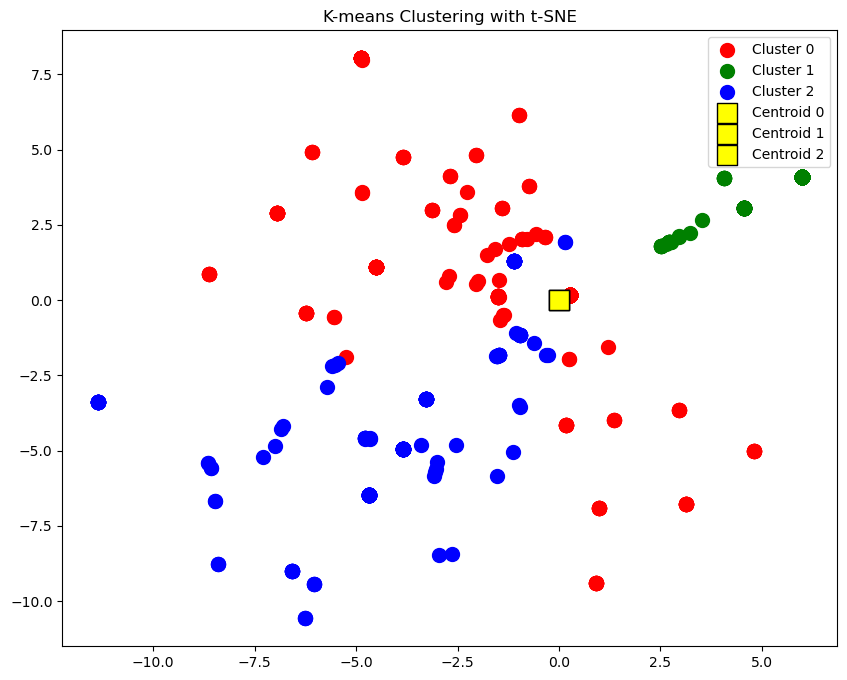

In [38]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
# 将稀疏矩阵转换为密集矩阵
dense_tfidf_matrix = tfidf_matrix.toarray()

# 提取聚类中心
centroids = kmeans.cluster_centers_

# 准备数据用于绘图
colors = ['r', 'g', 'b', 'y', 'c', 'm']
# 使用t-SNE进行降维
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
dense_tfidf_matrix_reduced = tsne.fit_transform(dense_tfidf_matrix)

# 可视化聚类结果
plt.figure(figsize=(10, 8))

# 绘制每个聚类中的点
for i in range(n_clusters):
    plt.scatter(dense_tfidf_matrix_reduced[labels == i, 0],
                dense_tfidf_matrix_reduced[labels == i, 1],
                s=100, c=colors[i], label=f'Cluster {i}')

# 绘制聚类中心
for i in range(n_clusters):
    plt.scatter(centroids[i, 0], centroids[i, 1], s=200, c='yellow', marker='s', edgecolor='black',
                label=f'Centroid {i}')

# 设置图表标题和图例
plt.title('K-means Clustering with t-SNE')
plt.legend()

# 显示图表
plt.show()
